## PHOENIX MODEL

In [2]:
import pandas as pd
prev_la_weather = pd.read_csv('mississippi_region_basin.csv')
prev_la_weather.head()

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
0,0,2016-01-01,6,16,0.0,1028,9
1,1,2016-01-02,6,8,0.0,1028,8
2,2,2016-01-03,6,5,0.0,1022,11
3,3,2016-01-04,6,12,0.0,1026,10
4,4,2016-01-05,3,11,0.0,1029,8


In [3]:
prev_la_weather.tail()

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
1730,1730,2020-09-26,24,6,0.0,1016,28
1731,1731,2020-09-27,26,9,0.0,1013,29
1732,1732,2020-09-28,24,13,0.0,1011,32
1733,1733,2020-09-29,19,16,0.0,1017,22
1734,1734,2020-09-30,20,8,0.0,1020,23


In [4]:
start_dates=['2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01']
end_dates=['2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31']

In [5]:
import requests
def get_weather(lat, lon):
    city_dat = []
    dates, temp, wind, precip, pressure, heat = [], [] ,[], [], [], []
    for i in range(len(start_dates)):
#         res_str = f'http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=7b7c4ad8a29e48c3a51114119200310&q={city}&format=json&date={start_dates[i]}&enddate={end_dates[i]}'
        res_str = f'http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=7b7c4ad8a29e48c3a51114119200310&q={lat},{lon}&format=json&date={start_dates[i]}&enddate={end_dates[i]}'

        city_dat.append(res_str)
#     print(city_dat[0])
        res = requests.get(res_str).json()['data']['weather']
        for j in range(len(res)):
            dates.append(res[j]['date'])
            temp.append(res[j]['avgtempC'])
            wind.append(res[j]['hourly'][4]['windspeedKmph'])
            precip.append(res[j]['hourly'][4]['precipMM'])
            pressure.append(res[j]['hourly'][4]['pressure'])
            heat.append(res[j]['hourly'][4]['HeatIndexC'])
    city_df = pd.DataFrame({
        "Dates":dates,
        "Temperature": temp,
        "Wind Speed": wind,
        "Precipitation": precip,
        "Pressure": pressure,
        "Heat Index": heat
    })
#     city_df.to_csv(f'{city}.csv')
    city_df.to_csv('mississippi_region_basin.csv')
    print("OK")

In [6]:
# test
get_weather(lat=31.657,lon=-89.086)

OK


In [7]:
new_la_weather = pd.read_csv('mississippi_region_basin.csv')

In [8]:
new_la_weather.head()

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
0,0,2015-03-01,13,6,0.0,1027,17
1,1,2015-03-02,15,7,0.0,1026,16
2,2,2015-03-03,18,13,0.0,1019,21
3,3,2015-03-04,20,16,0.0,1014,26
4,4,2015-03-05,5,21,0.0,1027,1


In [9]:
final_la_weather = pd.concat([new_la_weather,prev_la_weather])
final_la_weather

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
0,0,2015-03-01,13,6,0.0,1027,17
1,1,2015-03-02,15,7,0.0,1026,16
2,2,2015-03-03,18,13,0.0,1019,21
3,3,2015-03-04,20,16,0.0,1014,26
4,4,2015-03-05,5,21,0.0,1027,1
...,...,...,...,...,...,...,...
1730,1730,2020-09-26,24,6,0.0,1016,28
1731,1731,2020-09-27,26,9,0.0,1013,29
1732,1732,2020-09-28,24,13,0.0,1011,32
1733,1733,2020-09-29,19,16,0.0,1017,22


In [10]:
final_la_weather.to_csv('final_la_weather.csv')

---
## WEATHER COMPLETE, LA FIRE TIME

In [11]:
final_la_fire = pd.read_csv('la_fire_data.csv')

In [12]:
final_la_fire

,Unnamed: 0,Unnamed: 0.1,Latitude,Longitude,Date,Fire Intensity,Brightness,dist
0,595,595,31.0484,-88.9170,2015-03-06,9.3,300.4,69.571801
1,596,596,31.0546,-88.9237,2015-03-06,13.2,304.9,68.755367
2,853,853,31.3675,-88.2050,2015-03-07,14.3,303.2,89.532910
3,1087,1087,31.0440,-88.9319,2015-03-08,138.6,353.1,69.737433
4,1093,1093,31.5876,-88.2617,2015-03-08,23.2,310.5,78.453867
...,...,...,...,...,...,...,...,...
4017,751817,70263,31.5180,-88.6030,2020-09-30,21.2,319.8,48.305371
4018,751819,70265,31.5630,-88.2900,2020-09-30,21.4,318.1,76.124177
4019,751831,70277,31.5460,-88.3470,2020-09-30,10.9,310.8,71.090032
4020,751849,70295,31.4950,-88.2350,2020-09-30,80.6,345.0,82.630726


In [13]:
# remove unnamed columns
df = final_la_fire
df = df.loc[:, ~df.columns.str.contains('^Unnamed')].drop(columns=['Latitude', 'Longitude'])
df

,Date,Fire Intensity,Brightness,dist
0,2015-03-06,9.3,300.4,69.571801
1,2015-03-06,13.2,304.9,68.755367
2,2015-03-07,14.3,303.2,89.532910
3,2015-03-08,138.6,353.1,69.737433
4,2015-03-08,23.2,310.5,78.453867
...,...,...,...,...
4017,2020-09-30,21.2,319.8,48.305371
4018,2020-09-30,21.4,318.1,76.124177
4019,2020-09-30,10.9,310.8,71.090032
4020,2020-09-30,80.6,345.0,82.630726


In [14]:
# reassign to good var name
final_la_fire = df
final_la_fire = final_la_fire.rename(columns={'Date':"Dates"})
final_la_fire

,Dates,Fire Intensity,Brightness,dist
0,2015-03-06,9.3,300.4,69.571801
1,2015-03-06,13.2,304.9,68.755367
2,2015-03-07,14.3,303.2,89.532910
3,2015-03-08,138.6,353.1,69.737433
4,2015-03-08,23.2,310.5,78.453867
...,...,...,...,...
4017,2020-09-30,21.2,319.8,48.305371
4018,2020-09-30,21.4,318.1,76.124177
4019,2020-09-30,10.9,310.8,71.090032
4020,2020-09-30,80.6,345.0,82.630726


In [15]:
final_la_weather

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index
0,0,2015-03-01,13,6,0.0,1027,17
1,1,2015-03-02,15,7,0.0,1026,16
2,2,2015-03-03,18,13,0.0,1019,21
3,3,2015-03-04,20,16,0.0,1014,26
4,4,2015-03-05,5,21,0.0,1027,1
...,...,...,...,...,...,...,...
1730,1730,2020-09-26,24,6,0.0,1016,28
1731,1731,2020-09-27,26,9,0.0,1013,29
1732,1732,2020-09-28,24,13,0.0,1011,32
1733,1733,2020-09-29,19,16,0.0,1017,22


In [16]:
final_la_fire

,Dates,Fire Intensity,Brightness,dist
0,2015-03-06,9.3,300.4,69.571801
1,2015-03-06,13.2,304.9,68.755367
2,2015-03-07,14.3,303.2,89.532910
3,2015-03-08,138.6,353.1,69.737433
4,2015-03-08,23.2,310.5,78.453867
...,...,...,...,...
4017,2020-09-30,21.2,319.8,48.305371
4018,2020-09-30,21.4,318.1,76.124177
4019,2020-09-30,10.9,310.8,71.090032
4020,2020-09-30,80.6,345.0,82.630726


In [17]:
# add count of fires as feature
la_fire_cocunt = final_la_fire['Dates'].value_counts()
la_fire_cocunt

2016-02-19    47
2016-03-22    40
2019-11-19    37
2017-01-31    36
2018-03-03    33
              ..
2017-03-17     1
2015-11-16     1
2020-07-04     1
2016-01-24     1
2017-09-16     1
Name: Dates, Length: 773, dtype: int64

In [18]:
la_fire_count = la_fire_cocunt.to_frame().reset_index().rename(columns={"index":"Dates", "Dates":"Fire Count"}).sort_values(by="Dates", ascending=True)
la_fire_count

,Dates,Fire Count
524,2015-03-06,2
532,2015-03-07,1
152,2015-03-08,8
120,2015-03-16,10
198,2015-03-17,6
...,...,...
640,2020-09-11,1
675,2020-09-17,1
689,2020-09-19,1
429,2020-09-29,2


In [19]:
final_la_fire_merged = pd.merge(final_la_fire, la_fire_count, on='Dates', how='outer')
final_la_fire_merged

,Dates,Fire Intensity,Brightness,dist,Fire Count
0,2015-03-06,9.3,300.4,69.571801,2
1,2015-03-06,13.2,304.9,68.755367,2
2,2015-03-07,14.3,303.2,89.532910,1
3,2015-03-08,138.6,353.1,69.737433,8
4,2015-03-08,23.2,310.5,78.453867,8
...,...,...,...,...,...
4017,2020-09-30,21.2,319.8,48.305371,20
4018,2020-09-30,21.4,318.1,76.124177,20
4019,2020-09-30,10.9,310.8,71.090032,20
4020,2020-09-30,80.6,345.0,82.630726,20


In [20]:
los_angeles_data = pd.merge(final_la_weather, final_la_fire_merged, on='Dates', how='left')

In [21]:
los_angeles_data

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count
0,0,2015-03-01,13,6,0.0,1027,17,NaN,NaN,NaN,NaN
1,1,2015-03-02,15,7,0.0,1026,16,NaN,NaN,NaN,NaN
2,2,2015-03-03,18,13,0.0,1019,21,NaN,NaN,NaN,NaN
3,3,2015-03-04,20,16,0.0,1014,26,NaN,NaN,NaN,NaN
4,4,2015-03-05,5,21,0.0,1027,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5285,1734,2020-09-30,20,8,0.0,1020,23,21.2,319.8,48.305371,20.0
5286,1734,2020-09-30,20,8,0.0,1020,23,21.4,318.1,76.124177,20.0
5287,1734,2020-09-30,20,8,0.0,1020,23,10.9,310.8,71.090032,20.0
5288,1734,2020-09-30,20,8,0.0,1020,23,80.6,345.0,82.630726,20.0


In [22]:
# bhai = los_angeles_data.fillna(los_angeles_data.mean())
bhai = los_angeles_data.fillna(0)
bhai

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count
0,0,2015-03-01,13,6,0.0,1027,17,0.0,0.0,0.000000,0.0
1,1,2015-03-02,15,7,0.0,1026,16,0.0,0.0,0.000000,0.0
2,2,2015-03-03,18,13,0.0,1019,21,0.0,0.0,0.000000,0.0
3,3,2015-03-04,20,16,0.0,1014,26,0.0,0.0,0.000000,0.0
4,4,2015-03-05,5,21,0.0,1027,1,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5285,1734,2020-09-30,20,8,0.0,1020,23,21.2,319.8,48.305371,20.0
5286,1734,2020-09-30,20,8,0.0,1020,23,21.4,318.1,76.124177,20.0
5287,1734,2020-09-30,20,8,0.0,1020,23,10.9,310.8,71.090032,20.0
5288,1734,2020-09-30,20,8,0.0,1020,23,80.6,345.0,82.630726,20.0


In [23]:
bhai.to_csv('final_la_data.csv')

## ML STARTS NOW
### DATA PREPROCESSING DONE


In [24]:
# IMPORT LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

/home/pseudocodenerd/anaconda3/envs/torch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pseudocodenerd/anaconda3/envs/torch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pseudocodenerd/anaconda3/envs/torch/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pseudocodenerd/anac

In [25]:
src = pd.read_csv('final_la_data.csv', index_col=0)
src

,Unnamed: 0.1,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count
0,0,2015-03-01,13,6,0.0,1027,17,0.0,0.0,0.000000,0.0
1,1,2015-03-02,15,7,0.0,1026,16,0.0,0.0,0.000000,0.0
2,2,2015-03-03,18,13,0.0,1019,21,0.0,0.0,0.000000,0.0
3,3,2015-03-04,20,16,0.0,1014,26,0.0,0.0,0.000000,0.0
4,4,2015-03-05,5,21,0.0,1027,1,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5285,1734,2020-09-30,20,8,0.0,1020,23,21.2,319.8,48.305371,20.0
5286,1734,2020-09-30,20,8,0.0,1020,23,21.4,318.1,76.124177,20.0
5287,1734,2020-09-30,20,8,0.0,1020,23,10.9,310.8,71.090032,20.0
5288,1734,2020-09-30,20,8,0.0,1020,23,80.6,345.0,82.630726,20.0


In [26]:
df = src.loc[:, ~src.columns.str.contains('^Unnamed')]
df

,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count
0,2015-03-01,13,6,0.0,1027,17,0.0,0.0,0.000000,0.0
1,2015-03-02,15,7,0.0,1026,16,0.0,0.0,0.000000,0.0
2,2015-03-03,18,13,0.0,1019,21,0.0,0.0,0.000000,0.0
3,2015-03-04,20,16,0.0,1014,26,0.0,0.0,0.000000,0.0
4,2015-03-05,5,21,0.0,1027,1,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
5285,2020-09-30,20,8,0.0,1020,23,21.2,319.8,48.305371,20.0
5286,2020-09-30,20,8,0.0,1020,23,21.4,318.1,76.124177,20.0
5287,2020-09-30,20,8,0.0,1020,23,10.9,310.8,71.090032,20.0
5288,2020-09-30,20,8,0.0,1020,23,80.6,345.0,82.630726,20.0


In [27]:
df['Date'] = pd.to_datetime(df['Dates'], format="%Y-%m-%d")
df['month'] = df['Date'].dt.month
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df = df.drop(columns=['Dates', 'Date'])
df

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month
0,13,6,0.0,1027,17,0.0,0.0,0.000000,0.0,Mar
1,15,7,0.0,1026,16,0.0,0.0,0.000000,0.0,Mar
2,18,13,0.0,1019,21,0.0,0.0,0.000000,0.0,Mar
3,20,16,0.0,1014,26,0.0,0.0,0.000000,0.0,Mar
4,5,21,0.0,1027,1,0.0,0.0,0.000000,0.0,Mar
...,...,...,...,...,...,...,...,...,...,...
5285,20,8,0.0,1020,23,21.2,319.8,48.305371,20.0,Sep
5286,20,8,0.0,1020,23,21.4,318.1,76.124177,20.0,Sep
5287,20,8,0.0,1020,23,10.9,310.8,71.090032,20.0,Sep
5288,20,8,0.0,1020,23,80.6,345.0,82.630726,20.0,Sep


# PLEASE SKIP AMBITOIUS PLAN AHEAD (TIME ERIES STUFF)

In [69]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip install seaborn
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

     |████████████████████████████████| 283 kB 1.3 MB/s eta 0:00:01     |███████████████                 | 133 kB 1.3 MB/s eta 0:00:01


In [73]:
bhai

,Unnamed: 0,Dates,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,Fire Count
0,0,2015-03-01,11,10,0.0,1014,17,0.000000,0.000000,0.0
1,1,2015-03-02,11,8,0.0,1010,14,10.600000,302.000000,1.0
2,2,2015-03-03,11,6,0.0,1016,17,17.700000,309.285714,1.0
3,3,2015-03-04,11,2,0.0,1020,20,4.975000,305.925000,1.0
4,4,2015-03-05,13,8,0.0,1026,21,12.175000,316.300000,1.0
...,...,...,...,...,...,...,...,...,...,...
2036,1730,2020-09-26,22,10,0.0,1016,25,0.000000,0.000000,0.0
2037,1731,2020-09-27,26,8,0.0,1012,27,157.545455,351.018182,1.0
2038,1732,2020-09-28,27,5,0.0,1013,28,172.746769,358.553538,1.0
2039,1733,2020-09-29,25,6,0.0,1016,27,73.657143,324.331429,1.0


In [75]:
bhai.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2041.0,759.877511,528.784728,0.0,255.0,714.0,1224.000000,1734.000
Temperature,2041.0,13.507594,5.751391,0.0,12.0,14.0,17.000000,28.000
Wind Speed,2041.0,12.896129,6.479378,0.0,9.0,12.0,16.000000,49.000
Precipitation,2041.0,0.072268,0.560230,0.0,0.0,0.0,0.000000,20.400
Pressure,2041.0,1016.376286,4.658379,988.0,1013.0,1016.0,1019.000000,1035.000
Heat Index,2041.0,19.258697,5.233724,8.0,15.0,19.0,25.000000,40.000
Fire Intensity,2041.0,12.954302,33.036800,0.0,0.0,0.0,15.066667,703.675
Brightness,2041.0,150.087421,159.650565,0.0,0.0,0.0,317.880000,367.242
Fire Count,2041.0,0.469868,0.499214,0.0,0.0,0.0,1.000000,1.000


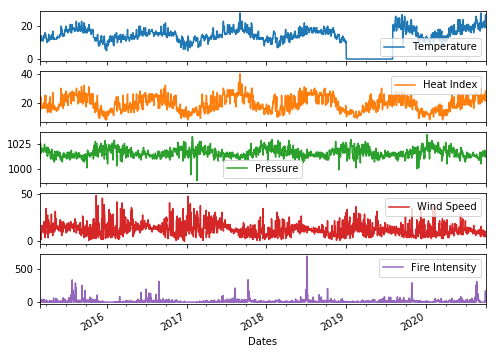

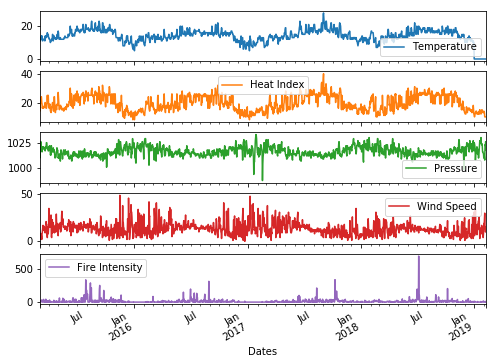

In [83]:
df = bhai
# date_time = pd.to_datetime(df.pop('Dates'), format="%Y-%m-%d")
plot_cols = ['Temperature', 'Heat Index', 'Pressure', 'Wind Speed', 'Fire Intensity']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:-600]
plot_features.index = date_time[:-600]
_ = plot_features.plot(subplots=True)

In [85]:
# 70 10 20 split
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [86]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

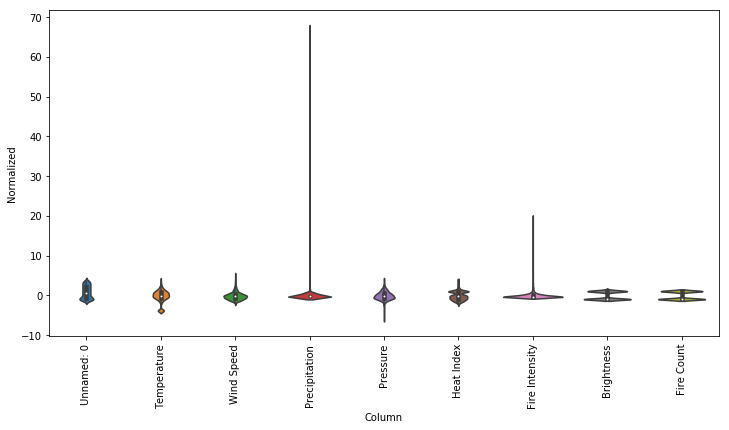

In [87]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [89]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

---

In [28]:
src = pd.get_dummies(df, prefix=['month'])
src

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month_Apr,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,13,6,0.0,1027,17,0.0,0.0,0.000000,0.0,0,...,0,0,0,0,0,1,0,0,0,0
1,15,7,0.0,1026,16,0.0,0.0,0.000000,0.0,0,...,0,0,0,0,0,1,0,0,0,0
2,18,13,0.0,1019,21,0.0,0.0,0.000000,0.0,0,...,0,0,0,0,0,1,0,0,0,0
3,20,16,0.0,1014,26,0.0,0.0,0.000000,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,21,0.0,1027,1,0.0,0.0,0.000000,0.0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,20,8,0.0,1020,23,21.2,319.8,48.305371,20.0,0,...,0,0,0,0,0,0,0,0,0,1
5286,20,8,0.0,1020,23,21.4,318.1,76.124177,20.0,0,...,0,0,0,0,0,0,0,0,0,1
5287,20,8,0.0,1020,23,10.9,310.8,71.090032,20.0,0,...,0,0,0,0,0,0,0,0,0,1
5288,20,8,0.0,1020,23,80.6,345.0,82.630726,20.0,0,...,0,0,0,0,0,0,0,0,0,1


## Regression Take 1

In [29]:
X=src.drop("Fire Intensity", axis=1)
y=src["Fire Intensity"].values.reshape(-1,1)
print(X.shape,y.shape)

(5290, 20) (5290, 1)


In [30]:
# ok data setup epic
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
a = [X_train, X_test, y_train, y_test]
for m in a:
    print(len(m))

3967
1323
3967
1323


In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:

print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.18081906259864322
Testing Data Score: 0.162112025706159


---
## Regression Take 2

In [34]:
X_c = src.drop("Fire Count", axis=1)
y_c = src["Fire Count"].values.reshape(-1,1)
print(X_c.shape, y_c.shape)

(5290, 20) (5290, 1)


In [35]:
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, random_state=1)

In [36]:
a = [X_c_train, X_c_test, y_c_train, y_c_test]
for m in a:
    print(len(m))

3967
1323
3967
1323


In [37]:
model_2 = LinearRegression()
model_2.fit(X_c_train, y_c_train)
print(f"Training Data Score: {model_2.score(X_c_train, y_c_train)}")
print(f"Testing Data Score: {model_2.score(X_c_test, y_c_test)}")

Training Data Score: 0.45049766916946
Testing Data Score: 0.4516177955014924


---

In [38]:
df = pd.merge(final_la_weather, final_la_fire_merged)
# df['Dates'] = pd.to_datetime(df['Dates'])
# mask = (df['Dates'] > '2020-07-01') & (df['Dates'] <= '2000-09-30')
# print(df.loc[mask])
df['date'] = pd.to_datetime(df['Dates'])
mask = (df['date'] > '2020-7-1') & (df['date'] <= '2020-9-30')
hol_out_df = df.loc[mask]

In [39]:
df = hol_out_df
df['Date'] = pd.to_datetime(df['Dates'], format="%Y-%m-%d")
df['month'] = df['Date'].dt.month
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')].drop(columns=['Dates', 'Date', 'date'])
df

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month
3907,30,3,0.0,1012,39,13.5,316.8,85.335954,1,Jul
3908,28,3,0.1,1013,35,10.4,319.5,8.154401,1,Jul
3909,28,10,2.5,1014,36,10.7,315.2,9.089953,3,Jul
3910,28,10,2.5,1014,36,3.8,308.4,82.888369,3,Jul
3911,28,10,2.5,1014,36,11.7,313.7,83.889483,3,Jul
...,...,...,...,...,...,...,...,...,...,...
4017,20,8,0.0,1020,23,21.2,319.8,48.305371,20,Sep
4018,20,8,0.0,1020,23,21.4,318.1,76.124177,20,Sep
4019,20,8,0.0,1020,23,10.9,310.8,71.090032,20,Sep
4020,20,8,0.0,1020,23,80.6,345.0,82.630726,20,Sep


In [40]:
new_la  = pd.get_dummies(df, prefix=['month'])
new_la

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month_Aug,month_Jul,month_Sep
3907,30,3,0.0,1012,39,13.5,316.8,85.335954,1,0,1,0
3908,28,3,0.1,1013,35,10.4,319.5,8.154401,1,0,1,0
3909,28,10,2.5,1014,36,10.7,315.2,9.089953,3,0,1,0
3910,28,10,2.5,1014,36,3.8,308.4,82.888369,3,0,1,0
3911,28,10,2.5,1014,36,11.7,313.7,83.889483,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,20,8,0.0,1020,23,21.2,319.8,48.305371,20,0,0,1
4018,20,8,0.0,1020,23,21.4,318.1,76.124177,20,0,0,1
4019,20,8,0.0,1020,23,10.9,310.8,71.090032,20,0,0,1
4020,20,8,0.0,1020,23,80.6,345.0,82.630726,20,0,0,1


In [41]:
new_la['month_October']=0
new_la['month_November']=0
new_la['month_December']=0
new_la['month_January']=0
new_la['month_February']=0
new_la['month_March']=0
new_la['month_April']=0
new_la['month_May']=0
new_la['month_June']=0
new_la

,Temperature,Wind Speed,Precipitation,Pressure,Heat Index,Fire Intensity,Brightness,dist,Fire Count,month_Aug,...,month_Sep,month_October,month_November,month_December,month_January,month_February,month_March,month_April,month_May,month_June
3907,30,3,0.0,1012,39,13.5,316.8,85.335954,1,0,...,0,0,0,0,0,0,0,0,0,0
3908,28,3,0.1,1013,35,10.4,319.5,8.154401,1,0,...,0,0,0,0,0,0,0,0,0,0
3909,28,10,2.5,1014,36,10.7,315.2,9.089953,3,0,...,0,0,0,0,0,0,0,0,0,0
3910,28,10,2.5,1014,36,3.8,308.4,82.888369,3,0,...,0,0,0,0,0,0,0,0,0,0
3911,28,10,2.5,1014,36,11.7,313.7,83.889483,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,20,8,0.0,1020,23,21.2,319.8,48.305371,20,0,...,1,0,0,0,0,0,0,0,0,0
4018,20,8,0.0,1020,23,21.4,318.1,76.124177,20,0,...,1,0,0,0,0,0,0,0,0,0
4019,20,8,0.0,1020,23,10.9,310.8,71.090032,20,0,...,1,0,0,0,0,0,0,0,0,0
4020,20,8,0.0,1020,23,80.6,345.0,82.630726,20,0,...,1,0,0,0,0,0,0,0,0,0


## PREDICTION
(i should really have split the dataset lol)

In [52]:
#predict FRP values
X_new_fire=new_la.drop("Fire Intensity", axis=1)
new_fire=model.predict(X_new_fire)
len(new_fire)

115

In [53]:
new_fire

array([[27.10378839],
       [31.66392127],
       [35.97858797],
       [29.88557157],
       [30.41417566],
       [32.67650381],
       [30.14713574],
       [31.55225472],
       [28.94328323],
       [28.90572211],
       [28.38622167],
       [30.79340402],
       [33.71864234],
       [32.59040288],
       [35.44680015],
       [37.85701206],
       [34.17890506],
       [34.7970658 ],
       [26.27523155],
       [31.52032176],
       [31.52879706],
       [31.26654225],
       [32.33576393],
       [29.45398643],
       [28.32799915],
       [31.29143118],
       [32.51086225],
       [35.53010679],
       [29.52375514],
       [32.4903663 ],
       [33.04961705],
       [31.76428124],
       [34.49862452],
       [32.56581701],
       [33.33465941],
       [32.88090971],
       [32.22185479],
       [31.01018693],
       [31.12899767],
       [35.27667566],
       [35.58158796],
       [35.78120091],
       [35.0989514 ],
       [36.47959863],
       [31.48930604],
       [31

In [54]:
new_fire_list=[]
for i in range(len(new_fire)):
    new_fire_list.append(new_fire[i][0])
new_fire_list

[27.103788394023,
 31.663921272025412,
 35.97858797119808,
 29.885571574837037,
 30.41417565916712,
 32.67650380783992,
 30.1471357425759,
 31.55225471873881,
 28.943283231111543,
 28.905722108565108,
 28.386221665837404,
 30.793404018798903,
 33.71864233538029,
 32.590402881019244,
 35.44680015374947,
 37.857012062765065,
 34.178905056017236,
 34.79706579627294,
 26.275231548877326,
 31.520321755612386,
 31.528797058202265,
 31.266542246094208,
 32.335763930072574,
 29.45398642900726,
 28.32799914647948,
 31.291431175682334,
 32.51086225453358,
 35.53010679151548,
 29.52375514111824,
 32.490366299804656,
 33.049617046642105,
 31.76428124036118,
 34.49862452353646,
 32.5658170124153,
 33.334659413086115,
 32.88090970978684,
 32.22185479144153,
 31.010186931678007,
 31.12899766559003,
 35.2766756642753,
 35.5815879624111,
 35.78120090637086,
 35.098951401989815,
 36.4795986266906,
 31.489306035312644,
 31.127667896311138,
 32.26069669035658,
 30.273708345957438,
 35.23246533136587,
 35.

In [55]:
# prediciton data farme
predict_df=pd.DataFrame({'Fire Intensity': new_fire_list})
f=predict_df

In [56]:
new_dates = pd.date_range(start='2020-10-01', end='2020-11-30', freq='D')
print(new_dates)
print(len(new_dates))

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12',
               '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16',
               '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24',
               '2020-10-25', '2020-10-26', '2020-10-27', '2020-10-28',
               '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01',
               '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09',
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21',
               '2020-11-22', '2020-11-23', '2020-11-24', '2020-11-25',
      

In [51]:
predict_df['Dates']=list(new_dates)[:41]

ValueError: Length of values does not match length of index

In [57]:
predict_df = f.head(len(new_dates))
predict_df['Dates']=list(new_dates)

/home/pseudocodenerd/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
predict_df

,Fire Intensity,Dates
0,27.103788,2020-10-01
1,31.663921,2020-10-02
2,35.978588,2020-10-03
3,29.885572,2020-10-04
4,30.414176,2020-10-05
...,...,...
56,31.368614,2020-11-26
57,31.072318,2020-11-27
58,29.902513,2020-11-28
59,26.419575,2020-11-29


In [60]:
predict_df.to_csv('us-east-mississipi-basin61days.csv')

In [49]:
# comined CSV FOR JAISAL

In [62]:
lacsv = pd.read_csv('FINAL_LA_44_DAYS.csv')
sfcsv = pd.read_csv('FINAL_SF_40_DAYS.csv')
phoecsv = pd.read_csv('FINAL_PHOENIX_30_DAYS.csv')
merged = pd.merge(lacsv, sfcsv, on='Dates', how='outer')
final_merged = pd.merge(merged, phoecsv, on='Dates', how='outer')
df = final_merged
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Fire Intensity_x,Dates,Fire Intensity_y,Fire Intensity
0,74.672755,2020-10-01,56.875008,62.170287
1,76.782775,2020-10-02,23.059613,15.453074
2,75.725114,2020-10-03,58.301694,84.317342
3,72.082963,2020-10-04,41.389730,35.599108
4,69.535390,2020-10-05,37.952859,-11.448706
5,79.029996,2020-10-06,53.478314,6.452678
6,80.563014,2020-10-07,18.261467,-14.889214
7,73.666036,2020-10-08,46.624334,54.455350
8,66.687940,2020-10-09,43.255403,-13.095983
9,62.848122,2020-10-10,41.268187,-14.226464


In [63]:
df = df[ ['Dates'] + [ col for col in df.columns if col != 'Dates' ] ]


In [64]:
df

,Dates,Fire Intensity_x,Fire Intensity_y,Fire Intensity
0,2020-10-01,74.672755,56.875008,62.170287
1,2020-10-02,76.782775,23.059613,15.453074
2,2020-10-03,75.725114,58.301694,84.317342
3,2020-10-04,72.082963,41.389730,35.599108
4,2020-10-05,69.535390,37.952859,-11.448706
5,2020-10-06,79.029996,53.478314,6.452678
6,2020-10-07,80.563014,18.261467,-14.889214
7,2020-10-08,73.666036,46.624334,54.455350
8,2020-10-09,66.687940,43.255403,-13.095983
9,2020-10-10,62.848122,41.268187,-14.226464


In [66]:
jaisal = df.rename(columns={'Fire Intensity_x':"Los Angeles, CA", 'Fire Intensity_y': 'San Francisco, CA', "Fire Intensity":"Phoenix, AZ"})

In [67]:
jaisal.to_csv('city_wise(3)-data.csv')